# Enceladus Seasons
## Where is the sun looking at any given time?

Just a simple code to tell you what Enceladus' (and, really, Saturn's) seasons. 

Enceladus has essentially no inclination or axial tilt relative to Saturn, so it shares Saturn's seasons to a reasonable degree. Now if we wanted to get precise (that is, to actually fly the mission) we'd need more info, but this should give us a general timeframe of what's going on.

The only values needed to know the math are Saturn's Period and its Axial Tilt. The inclination of Saturn is irrelevant as the Sun's light goes out equally in all directions. 

Axial tilt: 26.73 degrees

Period: 29.4475 years

This gives us the cycle of Saturn's seasons... without a refernece point. Some date where we know what the season was at Saturn. Northern autumnal equinox occured on Aug 11, 2009. (according to JPL https://www.jpl.nasa.gov/news/cassini-reveals-new-ring-quirks-shadows-during-saturn-equinox/ ) Or, Day 223.

The equation we end up having is:

$$ \alpha' = -\alpha sin\left(\frac{(t - t_0)}{T}360 \right) $$

Where $\alpha'$ is the subsular latitude, $\alpha$ is Saturn's axial tilt, $t_0$ is the date of the southern vernal equinox (or northern autumnal equinox), T is saturn's year, and t is the current date (measured in years with days as fractional years). With inserted numbers this is:

$$ \alpha' = -26.73 sin \left(\frac{(t - (\frac{223}{365}+2009))}{29.4475}360 \right) $$

In the code there are some conversions between radians and degrees. The above equation operates under degrees, though. Numerical simplification below:

$$ \alpha' = -26.73 sin \left((t - 2009.6110)12.2251 \right) $$


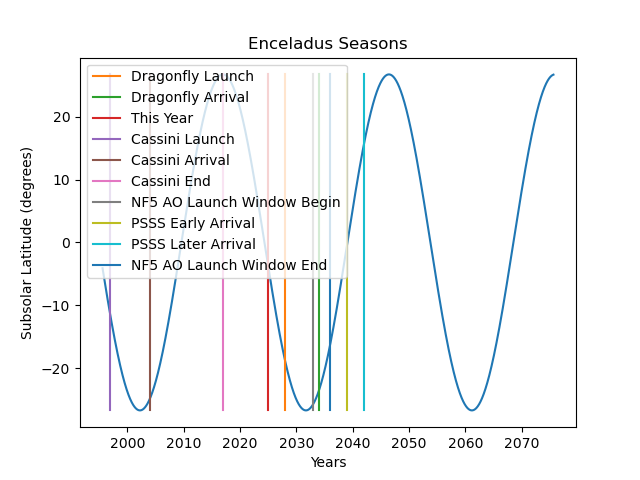

In [15]:
%matplotlib ipympl

import numpy as np
import math
import matplotlib.pyplot as plt

def seasonFunc(tilt, period, time):
    time = time - ((223./365.)+2009) 
    return (tilt * np.sin(time * (2 * math.pi / period)))*(180.0/math.pi)
    #Negative as our reference point is autumnal equinox for the north, 
    #thus we're heading into negative latitudes, leaving the north dark.
    
fig, ax = plt.subplots() #matplotlib's axis and figure notation is so annoying and obtuse...

tilt = 26.73
period = 29.4475
duration = 80

ax.set(xlabel='Years', ylabel='Subsolar Latitude (degrees)', title='Enceladus Seasons')

#Set up x and y divisions.        
xx = np.linspace((223./365.)+1995, (223./365.)+1995+duration, duration*365)
yy = seasonFunc(tilt*(math.pi/180.0), period, xx)

plt.plot(xx,yy)

#Additional context lines
x1 = np.linspace(2028,2028,3)
y1 = np.linspace(-tilt,tilt,3)
plt.plot(x1,y1,label="Dragonfly Launch")

x2 = np.linspace(2034,2034,3)
y2 = np.linspace(-tilt,tilt,3)
plt.plot(x2,y2,label="Dragonfly Arrival")

x3 = np.linspace(2025,2025,3)
y3 = np.linspace(-tilt,tilt,3)
plt.plot(x3,y3,label="This Year")

x3 = np.linspace(1997,1997,3)
y3 = np.linspace(-tilt,tilt,3)
plt.plot(x3,y3,label="Cassini Launch")

x3 = np.linspace(2004,2004,3)
y3 = np.linspace(-tilt,tilt,3)
plt.plot(x3,y3,label="Cassini Arrival")

x3 = np.linspace(2017,2017,3)
y3 = np.linspace(-tilt,tilt,3)
plt.plot(x3,y3,label="Cassini End")

x2 = np.linspace(2033,2033,3)
y2 = np.linspace(-tilt,tilt,3)
plt.plot(x2,y2,label="NF5 AO Launch Window Begin")

x2 = np.linspace(2039,2039,3)
y2 = np.linspace(-tilt,tilt,3)
plt.plot(x2,y2,label="PSSS Early Arrival")

x2 = np.linspace(2042,2042,3)
y2 = np.linspace(-tilt,tilt,3)
plt.plot(x2,y2,label="PSSS Later Arrival")

x2 = np.linspace(2036,2036,3)
y2 = np.linspace(-tilt,tilt,3)
plt.plot(x2,y2,label="NF5 AO Launch Window End")

ax.legend()

plt.show()

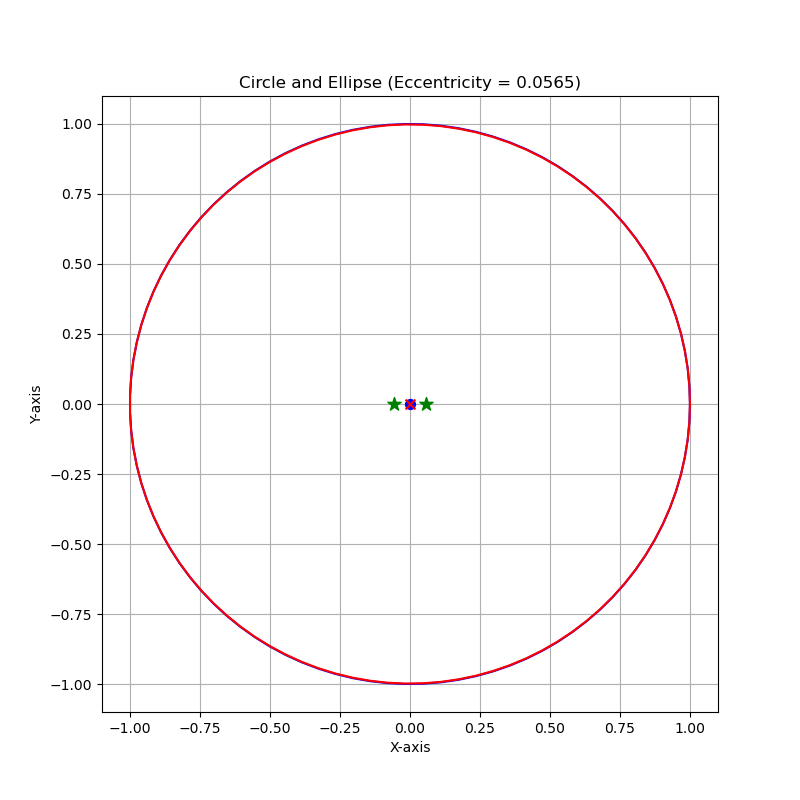

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle_and_ellipse(eccentricity_val):
    """
    Plots a circle and an ellipse with a given eccentricity.

    Args:
        eccentricity_val (float): The eccentricity of the ellipse.
                                  Must be between 0 and 1 (exclusive of 1).
    """

    if not (0 <= eccentricity_val < 1):
        print("Error: Eccentricity must be between 0 and 1 (exclusive of 1).")
        return

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.set_title(f'Circle and Ellipse (Eccentricity = {eccentricity_val:.4f})')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')

    # --- Circle Parameters ---
    circle_radius = 1.0
    circle_center_x = 0
    circle_center_y = 0

    # Generate points for the circle
    theta = np.linspace(0, 2 * np.pi, 100)
    circle_x = circle_center_x + circle_radius * np.cos(theta)
    circle_y = circle_center_y + circle_radius * np.sin(theta)
    ax.plot(circle_x, circle_y, label='Circle (Radius = 1)', color='blue')
    ax.scatter(circle_center_x, circle_center_y, color='blue', marker='o', s=50, zorder=5) # Plot center

    # --- Ellipse Parameters ---
    ellipse_semi_major_axis = 1.0  # Let's keep the semi-major axis same as circle radius for comparison
    ellipse_eccentricity = eccentricity_val

    # Calculate semi-minor axis 'b' using the eccentricity formula: e = sqrt(1 - b^2/a^2)
    # b = a * sqrt(1 - e^2)
    ellipse_semi_minor_axis = ellipse_semi_major_axis * np.sqrt(1 - ellipse_eccentricity**2)

    ellipse_center_x = 0
    ellipse_center_y = 0

    # Generate points for the ellipse
    ellipse_x = ellipse_center_x + ellipse_semi_major_axis * np.cos(theta)
    ellipse_y = ellipse_center_y + ellipse_semi_minor_axis * np.sin(theta)
    ax.plot(ellipse_x, ellipse_y, label=f'Ellipse (a={ellipse_semi_major_axis:.2f}, b={ellipse_semi_minor_axis:.2f})', color='red')
    ax.scatter(ellipse_center_x, ellipse_center_y, color='red', marker='x', s=50, zorder=5) # Plot center

    # Plot foci for the ellipse (c = a * e)
    c = ellipse_semi_major_axis * ellipse_eccentricity
    ax.scatter([ellipse_center_x + c, ellipse_center_x - c], [ellipse_center_y, ellipse_center_y],
               color='green', marker='*', s=100, zorder=5, label='Ellipse Foci')

    #ax.legend()
    plt.show()

# Call the function with the specified eccentricity
plot_circle_and_ellipse(0.0565)
